In [37]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [41]:
# Load the data
df = pd.read_csv('data/full_data.csv', parse_dates=['date', 'scrape_date'])

In [97]:
df['time_up'] = df['scrape_date'] - df['date']
df['time_up'] = df['time_up'].apply(lambda x: x.total_seconds())

df['log_view_count'] = np.log(df['view_count'].apply(lambda x: max(x, 1)))
df['log_time_up'] = np.log(df['time_up'].apply(lambda x: max(x, 3600*24)))

In [98]:
df.columns

Index(['feature_id', 'thumbnail_link', 'view_count', 'date', 'video_title',
       'video_description', 'subscriber_count', 'likes', 'scrape_date',
       'channel_name', 'channel_link', 'video_url', 'vid_page_titles',
       'vid_page_upload_date', 'vid_page_views', 'channel_scrape_date',
       'time_up', 'log_view_count', 'log_time_up'],
      dtype='object')

C:\Users\ninja\.conda\envs\ml2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


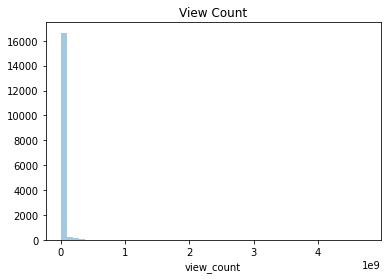

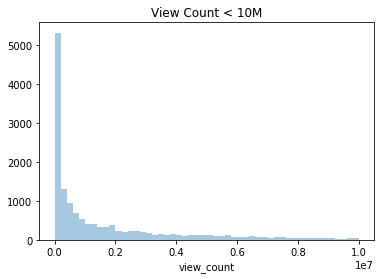

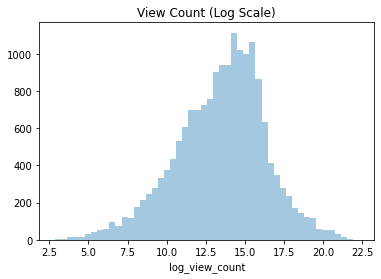

In [99]:
plt.title('View Count')
sns.distplot(df['view_count'], kde=False)
plt.show()

# View distribution under 10M views
plt.title('View Count < 10M')
sns.distplot(df['view_count'][df['view_count'] < 1e7], kde=False)
plt.show()

# Views log scale
plt.title('View Count (Log Scale)')
sns.distplot(df['log_view_count'], kde=False)
plt.show()

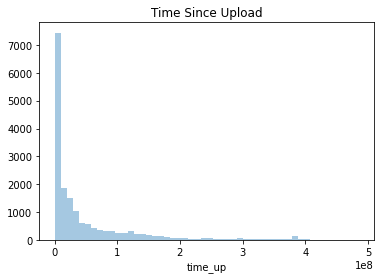

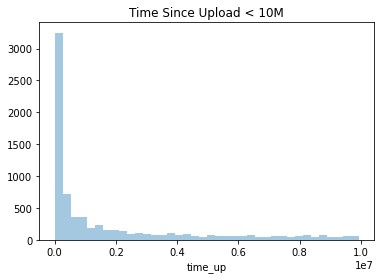

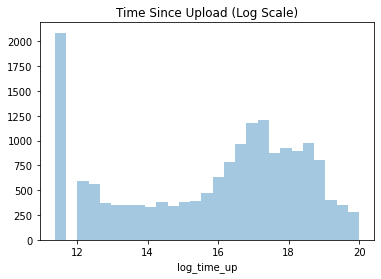

In [100]:
# Time since upload
plt.title('Time Since Upload')
sns.distplot(df['time_up'], kde=False)
plt.show()

# View distribution under 10M views
plt.title('Time Since Upload < 10M')
sns.distplot(df['time_up'][df['time_up'] < 1e7], kde=False)
plt.show()

# Views log scale
plt.title('Time Since Upload (Log Scale)')
sns.distplot(df['log_time_up'], kde=False)
plt.show()

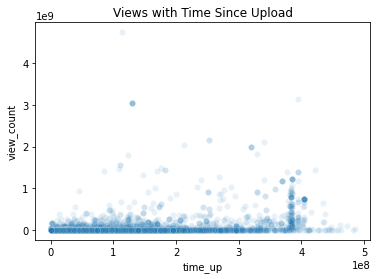

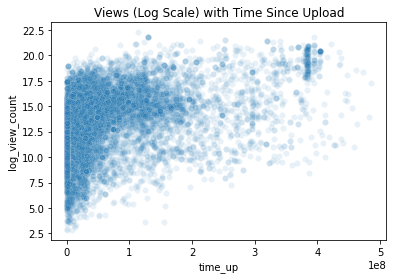

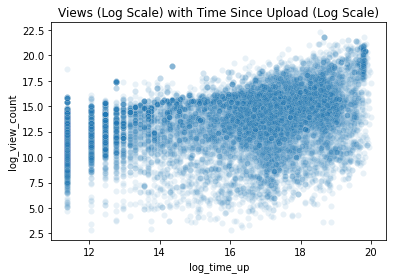

In [101]:
# Views with time correlation
plt.title('Views with Time Since Upload')
sns.scatterplot(x='time_up', y='view_count', data=df, alpha=0.1)
plt.show()

# Log scale for view count
plt.title('Views (Log Scale) with Time Since Upload')
sns.scatterplot(x='time_up', y='log_view_count', data=df, alpha=0.1)
plt.show()

# Log scale for both
plt.title('Views (Log Scale) with Time Since Upload (Log Scale)')
sns.scatterplot(x='log_time_up', y='log_view_count', data=df, alpha=0.1)
plt.show()

In [102]:
df['log_view_count'].corr(df['log_time_up'], method='pearson')

0.38342892427959335

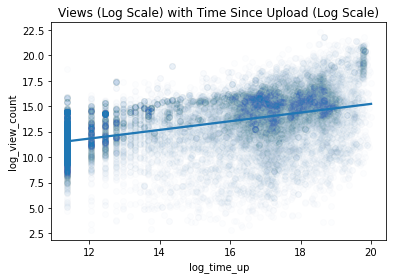

r^2: 0.1470


In [109]:
# Log scale for both
plt.title('Views (Log Scale) with Time Since Upload (Log Scale)')
sns.regplot(x='log_time_up', y='log_view_count', data=df, scatter_kws={'alpha': 0.01})
plt.show()

print('r^2: {:.4f}'.format(df['log_view_count'].corr(df['log_time_up'])**2))

In [24]:
channel_df = df[['channel_name', 'channel_link', 'subscriber_count']] \
    .drop_duplicates(subset=['channel_name'])

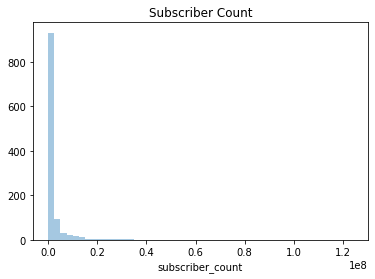

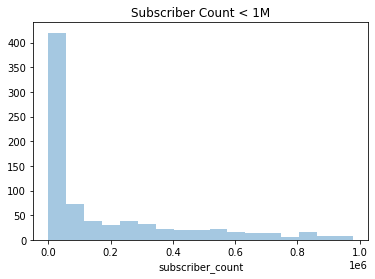

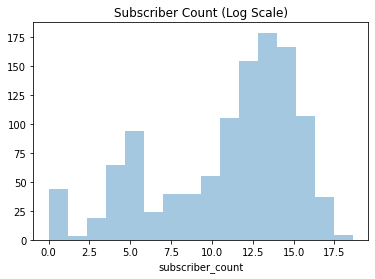

In [31]:
plt.title('Subscriber Count')
sns.distplot(channel_df['subscriber_count'], kde=False)
plt.show()

# View distribution under 10M views
plt.title('Subscriber Count < 1M')
sns.distplot(channel_df['subscriber_count'][channel_df['subscriber_count'] < 1e6], kde=False)
plt.show()

# Views log scale
plt.title('Subscriber Count (Log Scale)')
sns.distplot(np.log(channel_df['subscriber_count'].apply(lambda x: max(x, 1))), kde=False)
plt.show()